In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

In [116]:
dataset = pd.read_excel("../data/dataset_draft4_6.xlsx", index_col=0, dtype = {"gameId": "str"})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, 0 to 6883
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gameId                     6884 non-null   object 
 1   Top_wardsScorePerTimeDiff  6884 non-null   float64
 2   Jgl_wardsScorePerTimeDiff  6884 non-null   float64
 3   Mid_wardsScorePerTimeDiff  6884 non-null   float64
 4   Adc_wardsScorePerTimeDiff  6884 non-null   float64
 5   Spt_wardsScorePerTimeDiff  6884 non-null   float64
 6   Top_kdaDiff                6884 non-null   float64
 7   Top_creepScorePerTimeDiff  6884 non-null   float64
 8   Top_goldEarnedPerTimeDiff  6884 non-null   float64
 9   Jgl_kdaDiff                6884 non-null   float64
 10  Jgl_creepScorePerTimeDiff  6884 non-null   float64
 11  Jgl_goldEarnedPerTimeDiff  6884 non-null   float64
 12  Mid_kdaDiff                6884 non-null   float64
 13  Mid_creepScorePerTimeDiff  6884 non-null   float64
 1

In [117]:
dataset["winner"].head()

0     Red
1    Blue
2     Red
3    Blue
4    Blue
Name: winner, dtype: object

In [118]:
label_incoder = LabelEncoder()
dataset["winner"] = label_incoder.fit_transform(dataset["winner"])
dataset["winner"].head()

0    1
1    0
2    1
3    0
4    0
Name: winner, dtype: int32

In [119]:
dropped_dataset = dataset.drop(["gameId"], axis=1)
desired_X_column_list = list(dropped_dataset.columns)
desired_X_column_list.remove("winner")
dropped_dataset.drop_duplicates(desired_X_column_list)
y = dropped_dataset["winner"]
X = dropped_dataset.drop(["winner"], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, 0 to 6883
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Top_wardsScorePerTimeDiff  6884 non-null   float64
 1   Jgl_wardsScorePerTimeDiff  6884 non-null   float64
 2   Mid_wardsScorePerTimeDiff  6884 non-null   float64
 3   Adc_wardsScorePerTimeDiff  6884 non-null   float64
 4   Spt_wardsScorePerTimeDiff  6884 non-null   float64
 5   Top_kdaDiff                6884 non-null   float64
 6   Top_creepScorePerTimeDiff  6884 non-null   float64
 7   Top_goldEarnedPerTimeDiff  6884 non-null   float64
 8   Jgl_kdaDiff                6884 non-null   float64
 9   Jgl_creepScorePerTimeDiff  6884 non-null   float64
 10  Jgl_goldEarnedPerTimeDiff  6884 non-null   float64
 11  Mid_kdaDiff                6884 non-null   float64
 12  Mid_creepScorePerTimeDiff  6884 non-null   float64
 13  Mid_goldEarnedPerTimeDiff  6884 non-null   float64
 1

In [120]:
X.describe()

,Top_wardsScorePerTimeDiff,Jgl_wardsScorePerTimeDiff,Mid_wardsScorePerTimeDiff,Adc_wardsScorePerTimeDiff,Spt_wardsScorePerTimeDiff,Top_kdaDiff,Top_creepScorePerTimeDiff,Top_goldEarnedPerTimeDiff,Jgl_kdaDiff,Jgl_creepScorePerTimeDiff,...,Mid_kdaDiff,Mid_creepScorePerTimeDiff,Mid_goldEarnedPerTimeDiff,Adc_kdaDiff,Adc_creepScorePerTimeDiff,Adc_goldEarnedPerTimeDiff,Blue_Winrate,Red_Winrate,teamWinrateDiff,headtoHeadWinrate
count,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,...,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000
mean,-0.000004,-0.000027,-0.000009,0.000018,0.000008,-0.081450,0.000026,-0.008900,-0.063154,0.000044,...,-0.027190,-0.000052,-0.004080,-0.046252,-0.000063,-0.016671,0.516102,0.517253,-0.001151,0.495020
std,0.002419,0.003050,0.002779,0.003768,0.007186,2.494024,0.012535,0.630625,3.082586,0.010636,...,3.170627,0.012644,0.647504,3.242653,0.015530,0.693382,0.163952,0.164505,0.221596,0.182562
min,-0.015805,-0.012737,-0.021289,-0.020080,-0.037054,-10.215000,-0.102547,-2.820585,-12.260000,-0.066410,...,-12.911667,-0.111712,-3.304036,-13.558333,-0.075711,-2.675625,0.040000,0.041667,-0.714286,0.076923
25%,-0.001538,-0.002079,-0.001802,-0.002102,-0.004352,-1.693333,-0.007917,-0.408337,-2.132738,-0.006800,...,-2.115000,-0.007844,-0.405065,-2.197500,-0.009183,-0.456453,0.400000,0.405405,-0.143791,0.333333
50%,0.000013,-0.000021,0.000000,0.000000,0.000000,-0.049762,0.000000,-0.006257,-0.037500,0.000000,...,-0.033333,0.000000,-0.009449,0.000000,0.000000,-0.018896,0.531250,0.533333,0.000000,0.500000
75%,0.001535,0.002010,0.001793,0.002168,0.004365,1.505417,0.008087,0.393014,1.980833,0.006815,...,2.064464,0.007991,0.405142,2.039028,0.009134,0.423952,0.636364,0.636364,0.138941,0.625000
max,0.014404,0.012793,0.025584,0.019263,0.037631,14.666667,0.058956,2.767489,11.536667,0.052090,...,13.825000,0.074178,3.172695,13.833333,0.077770,2.998149,0.920000,0.923077,0.717105,0.923077


In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5925925925925926


In [124]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_

# 예측
y_pred_best = best_model.predict(X_test)

# 정확도 출력
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"mse with tuned parameters: {mse_best:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
mse with tuned parameters: 0.3602


In [131]:
feature_importances = best_model.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df

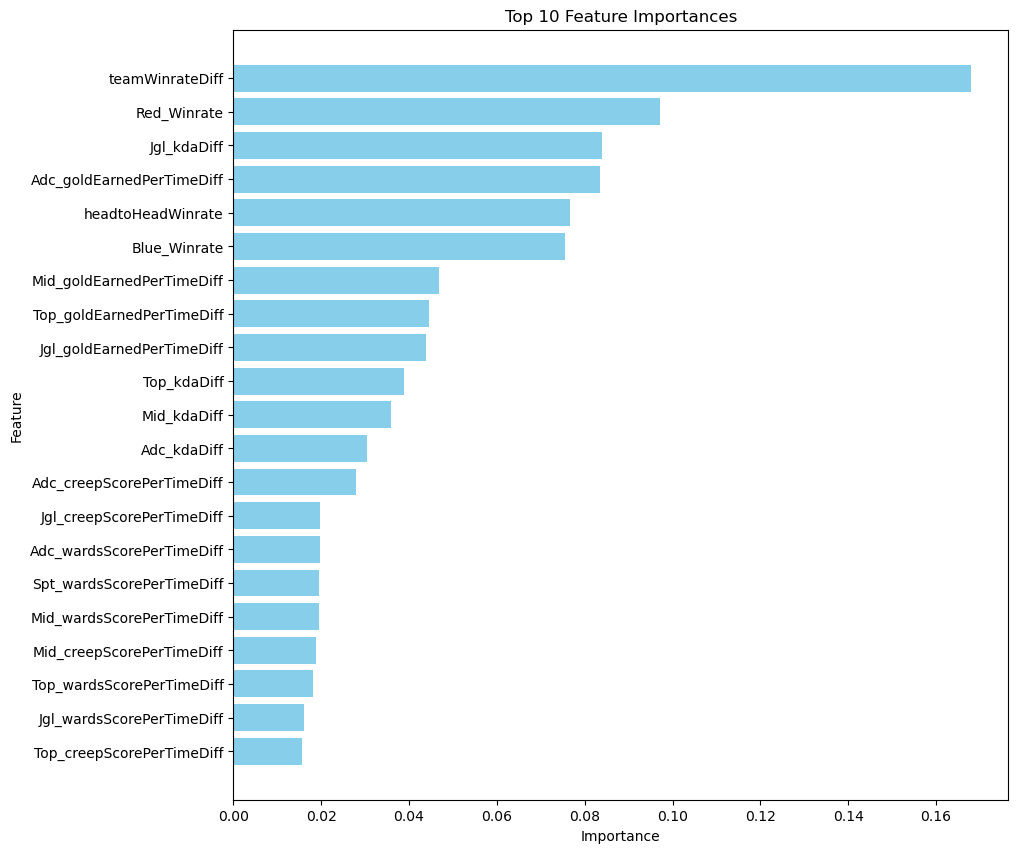

In [133]:
plt.figure(figsize=(10, 10))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()